##ImportLibrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##Preparing data for processing

In [27]:
df = pd.read_csv("/content/dataset.csv")
print(f"\nDataset size: {df.shape}")
print(f"\nData types in the dataset: \n{df.dtypes}")
print(f"\nColumn names in the dataset: \n{df.columns}")



Dataset size: (2000, 8)

Data types in the dataset: 
U           int64
M           int64
T           int64
A           int64
B           int64
L           int64
I           int64
Siniflar    int64
dtype: object

Column names in the dataset: 
Index(['U', 'M', 'T', 'A', 'B', 'L', 'I', 'Siniflar'], dtype='object')


In [28]:
df.head(5)

,U,M,T,A,B,L,I,Siniflar
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [29]:
df = df.sample(frac=1,random_state=63).reset_index(drop=True)
df.head(10)

,U,M,T,A,B,L,I,Siniflar
0,-48,-51,-53,-48,-64,-81,-79,3
1,-40,-54,-52,-39,-65,-70,-74,2
2,-56,-48,-43,-62,-43,-83,-82,4
3,-42,-55,-49,-45,-64,-70,-65,2
4,-61,-56,-57,-56,-75,-74,-81,1
5,-60,-59,-61,-62,-68,-81,-85,1
6,-68,-57,-66,-69,-76,-81,-82,1
7,-65,-59,-65,-67,-89,-85,-83,1
8,-48,-58,-54,-46,-66,-85,-88,3
9,-62,-50,-61,-64,-73,-80,-81,1


In [30]:
X = df.drop("Siniflar", axis=1)
y = df["Siniflar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [6]:
unique_classes = np.unique(y)
number_of_classes = len(unique_classes)
print("Classes:" ,unique_classes)
print("Number of Classes:", number_of_classes)

Siniflar: [1 2 3 4]
Sinif Sayisi: 4


In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6
0,-0.937648,-0.142516,0.751866,-0.905955,1.511549,-1.079872,-1.133380
1,-0.412692,0.743594,-0.180392,-0.385416,-0.578182,0.895098,0.234771
2,-0.937648,0.448224,0.006060,-0.905955,-1.018125,-0.472189,0.082754
3,0.024771,1.334333,1.497673,0.395393,-0.138238,0.135494,0.538804
4,-1.025140,-0.142516,-1.672006,-1.166225,-1.568055,-0.016426,-0.525313


In [9]:
y.shape , y_test.shape , y_train.shape

((2000,), (400,), (1600,))

##Visualizing data using LDA

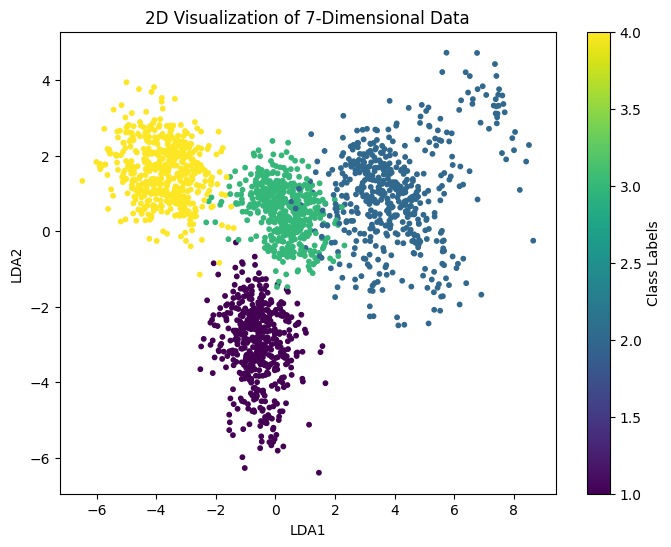

In [31]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(df.iloc[:, :-1], df.iloc[:, -1])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=df.iloc[:, -1], cmap='viridis', s=10)
plt.colorbar(label='Class Labels')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('2D Visualization of 7-Dimensional Data')
plt.show()

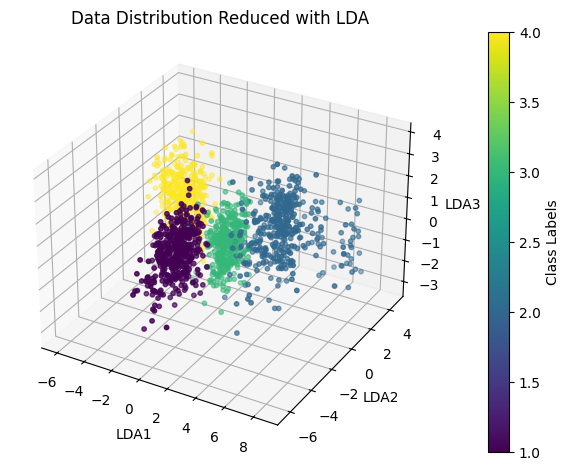

In [32]:
# Dimensionality reduction with LDA
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_train, y_train)

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(211, projection='3d')
scatter1 = ax1.scatter(
    X_lda[:, 0],
    X_lda[:, 1],
    X_lda[:, 2],
    c=y_train,
    cmap='viridis',
    s=10
)
ax1.set_title('Data Distribution Reduced with LDA')
ax1.set_xlabel('LDA1')
ax1.set_ylabel('LDA2')
ax1.set_zlabel('LDA3')
plt.colorbar(scatter1, ax=ax1, label='Class Labels')

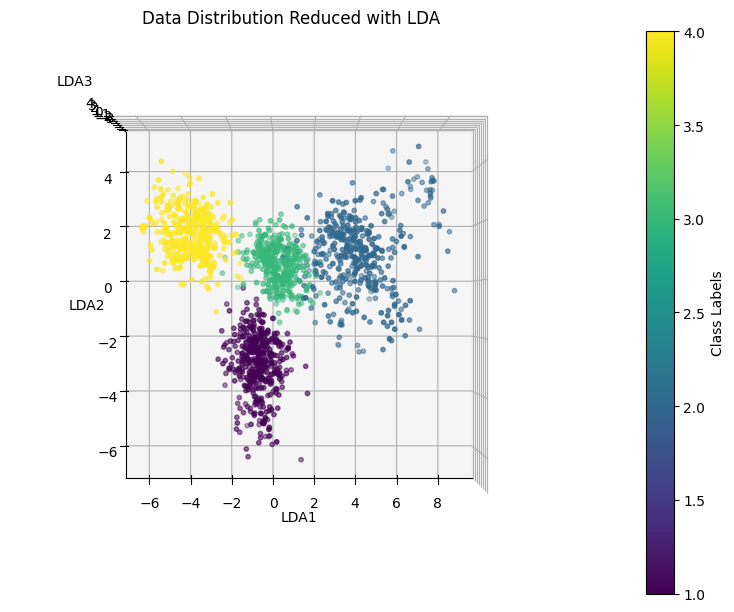

In [33]:
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_train, y_train)

fig = plt.figure(figsize=(15, 12))

ax2 = fig.add_subplot(212, projection='3d')
scatter2 = ax2.scatter(
    X_lda[:, 0],
    X_lda[:, 1],
    X_lda[:, 2],
    c=y_train,
    cmap='viridis',
    s=10
)
ax2.view_init(elev=90, azim=-90)
ax2.set_title('Data Distribution Reduced with LDA')
ax2.set_xlabel('LDA1')
ax2.set_ylabel('LDA2')
ax2.set_zlabel('LDA3')
plt.colorbar(scatter2, ax=ax2, label='Class Labels')

plt.tight_layout()
plt.show()

##Data processing using Random Forest and SVM

In [13]:
rf_model = RandomForestClassifier(n_estimators=630, random_state=63)
kf = KFold(n_splits=4, shuffle=True, random_state=63)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf)
rf_cv_var = np.var(rf_cv_scores)

rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_y_pred),
    "Precision": precision_score(y_test, rf_y_pred, average='weighted'),
    "Recall": recall_score(y_test, rf_y_pred, average='weighted'),
    "F1": f1_score(y_test, rf_y_pred, average='weighted')
}
print("Cross-Validation Scores (4-fold):", rf_cv_scores)
print("Variance of CV Scores:", rf_cv_var)
print("Random Forest Model Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.985  0.9775 0.99   0.9875]
Variance of CV Scores: 2.1874999999999898e-05
Random Forest Model Metrics:
Accuracy: 0.98750
Precision: 0.98757
Recall: 0.98750
F1: 0.98749


In [14]:
svm_model = SVC(kernel='linear', random_state=63)
kf = KFold(n_splits=4, shuffle=True, random_state=63)

svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kf)
svm_cv_var = np.var(svm_cv_scores)

svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_y_pred),
    "Precision": precision_score(y_test, svm_y_pred, average='weighted'),
    "Recall": recall_score(y_test, svm_y_pred, average='weighted'),
    "F1": f1_score(y_test, svm_y_pred, average='weighted')
}

print("Cross-Validation Scores (4-fold):", svm_cv_scores)
print("Variance of CV Scores:", svm_cv_var)
print("SVM Model Metrics:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.97   0.9725 0.9925 0.9825]
Variance of CV Scores: 7.92968750000004e-05
SVM Model Metrics:
Accuracy: 0.98000
Precision: 0.98004
Recall: 0.98000
F1: 0.97994


`Confusion Matrix`

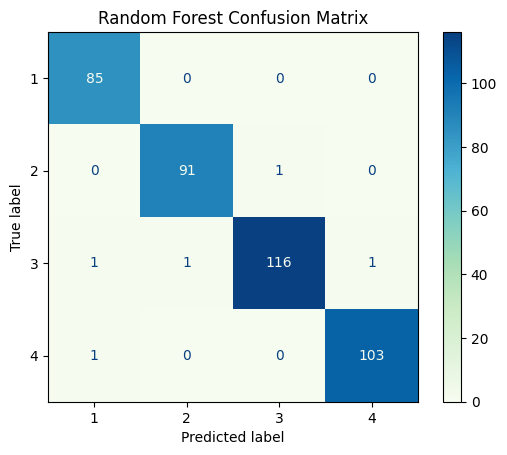

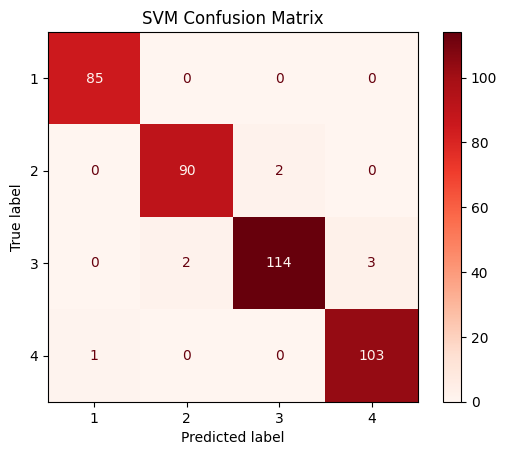

In [15]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp_rf.plot(cmap='GnBu')
plt.title('Random Forest Confusion Matrix')
plt.show()

svm_cm = confusion_matrix(y_test, svm_y_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.show()

##training our model using dimension reduction

In [34]:
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

svm_model = SVC(kernel='linear', random_state=63)
kf = KFold(n_splits=4, shuffle=True, random_state=63)

# Cross-validation using LDA-reduced data
svm_cv_scores = cross_val_score(svm_model, X_train_lda, y_train, cv=kf)
svm_cv_var = np.var(svm_cv_scores)
svm_model.fit(X_train_lda, y_train)
svm_y_pred = svm_model.predict(X_test_lda)

svm_metrics = {
    "Accuracy": accuracy_score(y_test, svm_y_pred),
    "Precision": precision_score(y_test, svm_y_pred, average='weighted'),
    "Recall": recall_score(y_test, svm_y_pred, average='weighted'),
    "F1": f1_score(y_test, svm_y_pred, average='weighted')
}
print("Cross-Validation Scores (4-fold):", svm_cv_scores)
print("Variance of CV Scores:", svm_cv_var)
print("SVM Model Metrics:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.5f}")

Cross-Validation Scores (4-fold): [0.9725 0.9675 0.9825 0.9775]
Variance of CV Scores: 3.1250000000000055e-05
SVM Model Metrics:
Accuracy: 0.97000
Precision: 0.97007
Recall: 0.97000
F1: 0.96982


##Hard margin image by increasing the C value

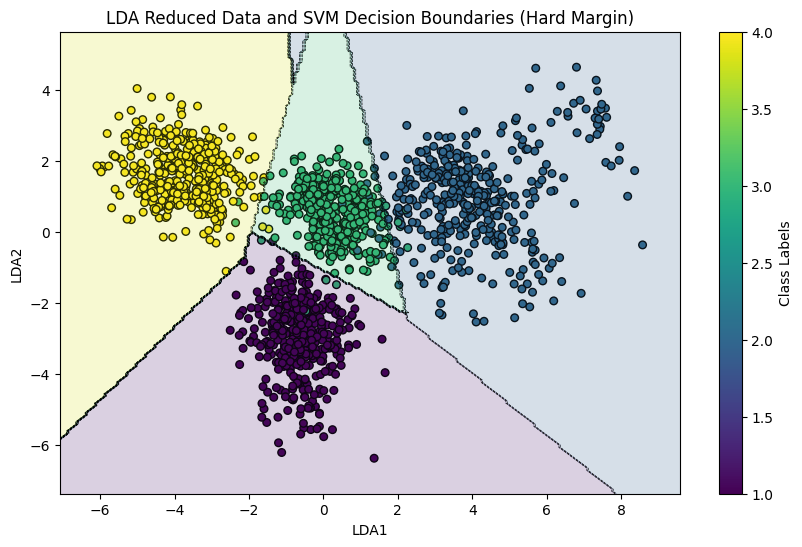

In [36]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

svm_model = SVC(kernel='linear', C=2000)  # hard Margin
svm_model.fit(X_train_lda, y_train)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, linestyles='--')

plt.title('LDA Reduced Data and SVM Decision Boundaries (Hard Margin)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Class Labels')
plt.show()


##Soft margin image by decreasing the C value

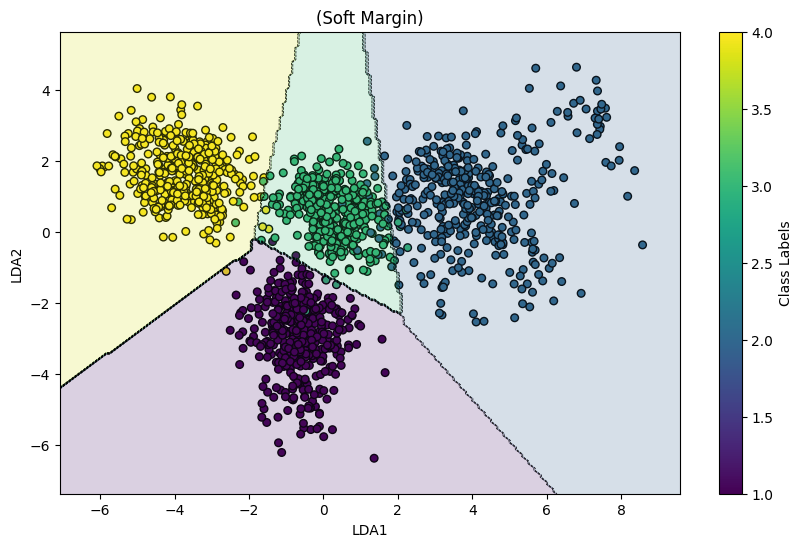

In [38]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

svm_model = SVC(kernel='linear', C=0.1)  # soft Margin
svm_model.fit(X_train_lda, y_train)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, linestyles='--')

plt.title('(Soft Margin)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Class Labels')
plt.show()

##success metrics according to c value

In [39]:
# Hard Margin SVM
svm_hard = SVC(kernel='linear', C=2000, random_state=42)
svm_hard.fit(X_train, y_train)
hard_y_pred = svm_hard.predict(X_test)

# Soft Margin SVM
svm_soft = SVC(kernel='linear', C=0.1, random_state=42)
svm_soft.fit(X_train, y_train)
soft_y_pred = svm_soft.predict(X_test)

metrics = {
    "Accuracy": accuracy_score,
    "Precision": lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    "Recall": lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    "F1": lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {"Hard Margin": {}, "Soft Margin": {}}
for metric_name, metric_func in metrics.items():
    results["Hard Margin"][metric_name] = metric_func(y_test, hard_y_pred)
    results["Soft Margin"][metric_name] = metric_func(y_test, soft_y_pred)

for margin, result in results.items():
    print(f"\n{margin} Metrics:")
    for metric_name, value in result.items():
        print(f"{metric_name}: {value:.4f}")


Hard Margin Metrics:
Accuracy: 0.9775
Precision: 0.9778
Recall: 0.9775
F1: 0.9775

Soft Margin Metrics:
Accuracy: 0.9800
Precision: 0.9802
Recall: 0.9800
F1: 0.9800


`Confusion Matrix`

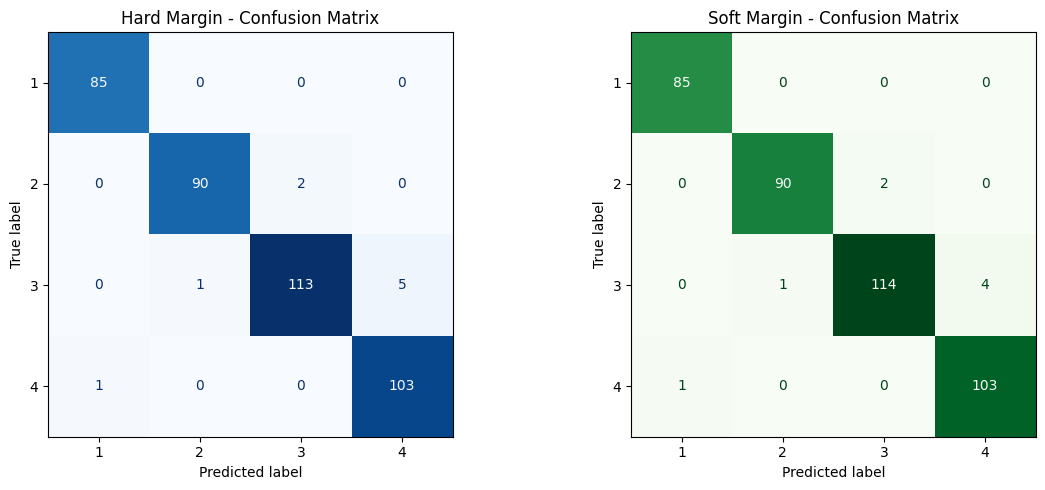

In [40]:
# Hard Margin SVM
svm_hard = SVC(kernel='linear', C=1000, random_state=42)  # C büyük (Hard Margin)
svm_hard.fit(X_train, y_train)
hard_y_pred = svm_hard.predict(X_test)

# Soft Margin SVM
svm_soft = SVC(kernel='linear', C=0.1, random_state=42)  # C küçük (Soft Margin)
svm_soft.fit(X_train, y_train)
soft_y_pred = svm_soft.predict(X_test)

cm_hard = confusion_matrix(y_test, hard_y_pred)
disp_hard = ConfusionMatrixDisplay(confusion_matrix=cm_hard, display_labels=svm_hard.classes_)

cm_soft = confusion_matrix(y_test, soft_y_pred)
disp_soft = ConfusionMatrixDisplay(confusion_matrix=cm_soft, display_labels=svm_soft.classes_)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hard Margin Confusion Matrix
axes[0].set_title("Hard Margin - Confusion Matrix")
disp_hard.plot(ax=axes[0], cmap="Blues", colorbar=False)

# Soft Margin Confusion Matrix
axes[1].set_title("Soft Margin - Confusion Matrix")
disp_soft.plot(ax=axes[1], cmap="Greens", colorbar=False)

plt.tight_layout()
plt.show()

##According to the value of n_estimators in Random Forest

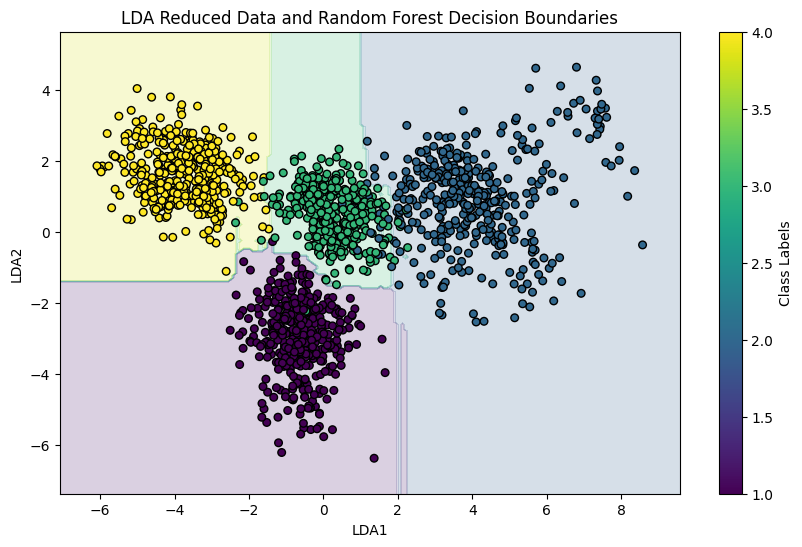

In [42]:
# Dimensionality reduction with LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=63)
rf_model.fit(X_train_lda, y_train)

# Create a meshgrid to calculate decision boundaries
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualization
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

plt.title('LDA Reduced Data and Random Forest Decision Boundaries')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Class Labels')
plt.show()


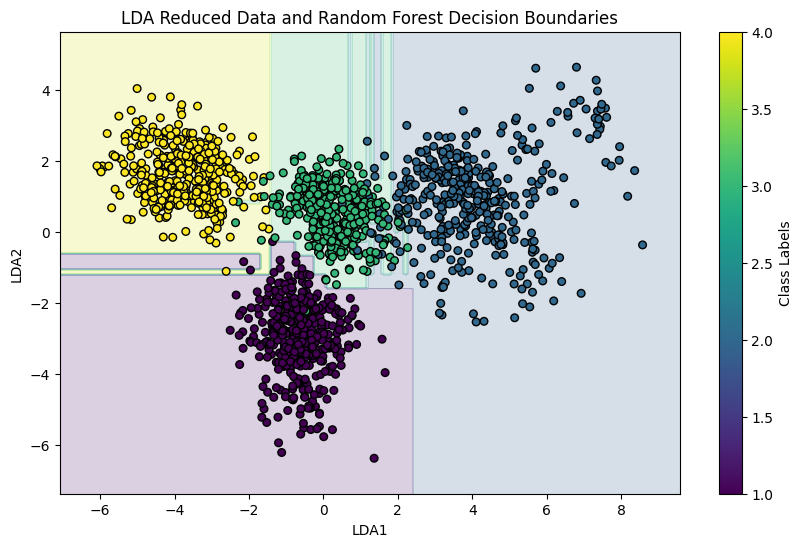

In [43]:
# Dimensionality reduction with LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=1, random_state=63)
rf_model.fit(X_train_lda, y_train)

# Create a meshgrid to calculate decision boundaries
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualization
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=30, edgecolors='k')

plt.title('LDA Reduced Data and Random Forest Decision Boundaries')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.colorbar(scatter, label='Class Labels')
plt.show()


Confusion Matrix

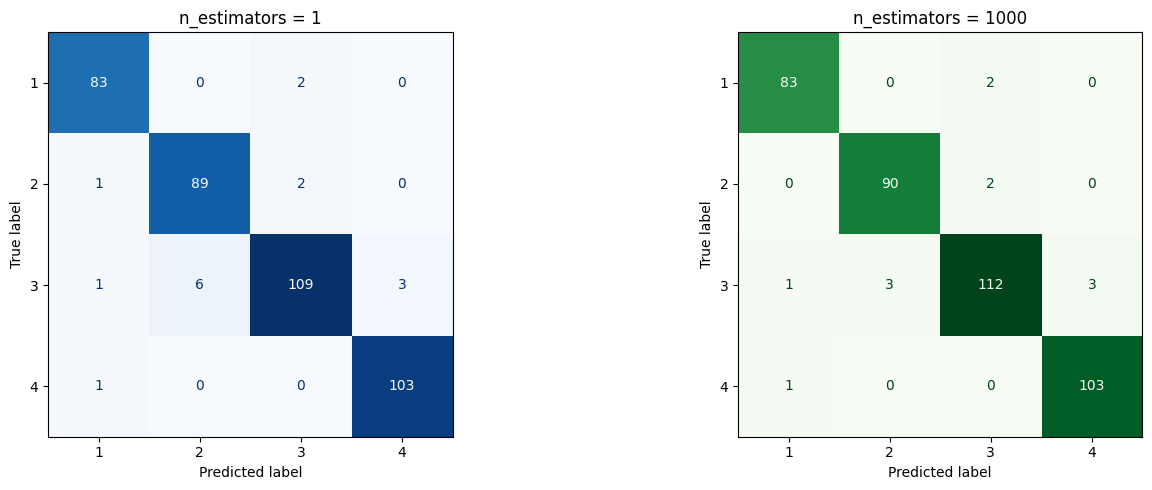

In [46]:
# Dimensionality reduction with LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Random Forest models with different n_estimators
rf_models = {
    "n_estimators = 1": RandomForestClassifier(n_estimators=1, random_state=63),
    "n_estimators = 1000": RandomForestClassifier(n_estimators=1000, random_state=63)
}

# Confusion matrices plotting
fig, axes = plt.subplots(1, len(rf_models), figsize=(15, 5))

# Color maps for each model
color_maps = ["Blues", "Greens"]

for idx, (title, model) in enumerate(rf_models.items()):
    # Train the model
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Plot confusion matrix with specific color map
    axes[idx].set_title(title)
    disp.plot(ax=axes[idx], cmap=color_maps[idx], colorbar=False)

plt.tight_layout()
plt.show()